### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Lecture 4: Bipartite Graphs and Projections

We'll look at further properties of graphs and networks, both from a theoretical point of views and 
from the practical side of handling graphs in the `NetworkX` environment.  Start by importing the necessary
`python` libraries into this `jupyter` notebook.

In [1]:
import networkx as nx
import numpy as np

Provide a sample graph, as before.

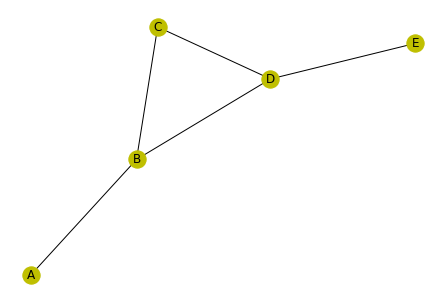

In [2]:
G = nx.Graph(["AB", "BC", "BD", "CD", "DE"])
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(G, **opts)

## Composition and Adjacency Matrices.

Relations can be composed, like functions.  If $R$ is a relation
from a set $X$ to a set $Y$, and if $S$ is a relation from $Y$ to a set $Z$,
then the __composite relation__ $R \circ S$ is the relation
from $X$ to $Z$, defined by $x (R \circ S) z$ if there is a
an element $y \in Y$ such that $x R y$ and $y S z$.

The adjacency matrix of the composite relation $R \circ S$
is essentially the (matrix) product of the adjacency matrices
of the individual relations $R$ and $S$.
If $A = (a_{ij})$ is the adjacency matrix of $R$, and $B = (b_{jk})$ the adjacency matrix of $S$,
then the $i,k$-entry of the product $AB$ is

$$(AB)_{ik} = \sum_{j} a_{ij} b_{jk}$$,

which is exactly the _number_ of elements $y \in Y$ such that $x_i R
y$ and $y S z_k$.  All it needs for $x_i$ to be $(R \circ S)$-related
to $z_k$ is this number to be at least $1$.  Hence, replacing all
nonzero entries in the product matrix $AB$ with $1$ yields the
adjacency matrix of the composite $R \circ S$.

Let's write $A \circ B$ for this matrix.

[counting transitive relations]: https://cs.uwaterloo.ca/journals/JIS/VOL7/Pfeiffer/pfeiffer6.html

In [3]:
A = nx.adjacency_matrix(G).todense()
AA = A * A
print(AA)

[[1 0 1 1 0]
 [0 3 1 1 1]
 [1 1 2 1 1]
 [1 1 1 3 0]
 [0 1 1 0 1]]


In [4]:
AA[AA>1] = 1
np.fill_diagonal(AA, 0)
print(AA)

[[0 0 1 1 0]
 [0 0 1 1 1]
 [1 1 0 1 1]
 [1 1 1 0 0]
 [0 1 1 0 0]]


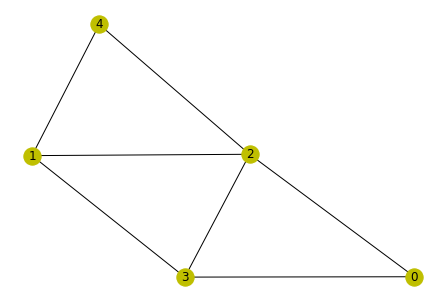

In [5]:
GG = nx.from_numpy_matrix(AA)
nx.draw(GG, **opts)

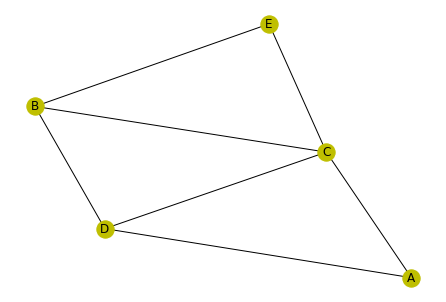

In [6]:
nx.relabel_nodes(GG, { i : "ABCDE"[i] for i in range(5)}, copy=False)
nx.draw(GG, **opts)

### Bipartite Graphs

<div class="alert alert-warning">
    A (simple) graph $G = (X, E)$ is called <b>bipartite</b>, if the vertex set $X$ is a disjoint union
of two sets $B$ (of black nodes) and $W$ (of white nodes) so that each edge in $E$ links a
black vertex with a white vertex.
    </div>

Here is a sample bipartite graph $B$, specified to the `Graph` constructor by its edge list.

In [ ]:
B = nx.Graph([(1,6), (2,6), (2,7), (2,8), (2,9), 
              (3,9), (4,10), (5,9), (5,10)])

In this graph, the *white* nodes can be taken  as the set $\{1,2,\dots,5\}$ 
and the *black* nodes as $\{6, 7, \dots, 10\}$.
The drawing command `nx.draw` takes as optional argument a dictionary `pos` that specifies for
each node a (relative) position in the drawing.  Here, the node is the key and the 
position is a pair of $x$,$y$-coordinates.  In this example we can use the (integer) quotient
and remainder, as returned by the python method `divmod` to quickly compute a dictionary of positions
that have the white nodes on the left, and the black nodes on the right.

In [ ]:
divmod(7, 5)

In [ ]:
pos = {x + 1: divmod(x, 5) for x in range(10)}
pos

In [ ]:
nx.draw(B, pos, with_labels=True)

Node colors can be specified as a *list* assigned to the keyword argument `node_color`.  We can use the $x$-coordinates of the node positions for that purpose.

In [ ]:
color = [pos[x][0] for x in B.nodes()]
color

In [ ]:
nx.draw(B, pos, with_labels=True, node_color=color, font_color='r')

A **(vertex)-coloring** of a graph $G$ is an assignment of (finitely many) colors to the nodes of $G$,
so that any two nodes which are connected by an edge have *different* colors.

A graph is called **$N$-colorable**, if it has a vertex coloring with (at most) $N$ colors.

<div class="alert alert-danger">
    <b>Theorem.</b> Let $G$ be a graph.  The following are equivalent:
<ul>
    <li>$G$ is bipartite;</li>
    <li>$G$ is $2$-colorable;</li>
    <li>each cycle in $G$ has even length.</li>
</ul>
    (See below for <b>cycle</b> and <b>length</b>)
</div>

2D grids are naturally bipartite:

In [ ]:
G44 = nx.grid_2d_graph(4, 4)
nx.draw(G44)

The method `nx.bipartite.color` determines a $2$-coloring of a graph $G$ algorithmically, if it exists, i.e. if
$G$ is bipartite.

In [ ]:
color = nx.bipartite.color(G44)
color

In [ ]:
color = [color[x] for x in G44.nodes()]
nx.draw(G44, with_labels=True, node_color=color, font_color='r')

### Affiliation Networks and Projections

Bipartite graphs arise in practice as models for **affiliation networks**.
In such a network, the *black* nodes are people, and the *white* nodes are attributes 
of the people, such as common interests (books bought online), workplaces, social events attended ...
Edges in such network connect people with their attributes.

A frequently cited example form the sociology literature (Davis, A., Gardner, B., and 
Gardner, R. 1941. 
Deep South.
Chicago: University of Chicago Press.) is the **Southern Women Network**.
This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recorded which women met for which events.

<img src="https://www.researchgate.net/profile/Linton_Freeman/publication/246188409/figure/fig1/AS:298262658600961@1448122767704/Participation-of-the-Southern-Women-in-Events.png">

The resulting bipartite graph on the vertex set consisting of the 18 woman and the 14 events is readily available in NetworkX.

In [ ]:
G = nx.generators.social.davis_southern_women_graph()
list(G.nodes())

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
color = nx.bipartite.color(G)
color = [color[x] for x in G.nodes()]
nx.draw(G, with_labels=True, node_color=color, font_color='r')

**Note.** The adjacency matrix $A$ of a bipartite graph $G$, with respect to a suitable ordering of the vertices
($B$ first, then $W$), has the form of a $2 \times 2$-block matrix,
$$
  A = \left( \begin{array}{cc} 0 & C \\ C^T & 0 \end{array} \right)
$$
where the blocks on the diagonal consist entirely of zeros, as there are no edges between vertices of the same color, and the lower left block is the *transpose* of the matrix $C$ of entries in the upper right. 

In [ ]:
A = nx.adjacency_matrix(G)
print(A.todense())

In [ ]:
import numpy as np
with np.printoptions(threshold=9999):
    print(A.todense())

In NetworkX, all parts of a graph can have **attributes**: the nodes, 
the edges, and the graph object itself.  Graph object attributes of a graph `G` are stored in the field `G.graph`.  By convention, the two
underlying sets of a bipartite graph are stored here as attributes
called `'top'` and `'bottom'`.

In [ ]:
X, Y = G.graph['top'], G.graph['bottom']
C = nx.bipartite.biadjacency_matrix(G, X, Y)
print(C.todense())

As $A = A^T$, we get
\\[
A^T \cdot A = A \cdot A^T = A \cdot A = 
\left(
\begin{array}{cc}
C \cdot C^T & 0 \\ 0 & C^T \cdot C
\end{array}
\right)
\\]
where $C \cdot C^T$ is the adjacency matrix of the **projection** onto the vertex set $B$,
and $C^T \cdot C$is the adjacency matrix of the **projection** onto the vertex set $W$.

In [ ]:
BB = nx.from_numpy_matrix((C*C.transpose()).todense())
nx.draw(BB)

In [ ]:
nodes = G.graph['top']
mapping = {i: nodes[i] for i in range(len(nodes))}
nx.relabel_nodes(BB, mapping, False)
nx.draw(BB, with_labels=True)

In [ ]:
BBB = nx.bipartite.projected_graph(G, G.graph['top'])
nx.draw(BBB, with_labels=True)

In [ ]:
WWW = nx.bipartite.projected_graph(G, G.graph['bottom'])
nx.draw(WWW, with_labels=True)

In [ ]:
print((C*C.transpose()).todense())

##  Code Corner

### `Numpy`

### `networkx`

* `relabel_nodes`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.relabel.relabel_nodes.html#networkx.relabel.relabel_nodes)

## Exercises

1. Compute the adjacency matrix of the bipartite graph $B$ at the top 
of this page and verify its block structure.

1. Compute the biadjacency matrix $C$ of the graph $B$.

1. Compute the two products of $C$ and its transpose,
and, using the products as adjacency matrix, construct two graphs
from them.

1. Compute the two projections of the bipartite graph $B$ and
compare them with the graphs constructed in the previous exercise.